# Seoul Bike Sharing Dataset

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor as KNN_R
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score as cv_score
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder as le
bike_data = pd.read_csv('Datasets/SeoulBikeData.csv', encoding= 'unicode_escape',parse_dates =["Date"], index_col ="Date")

In [3]:
display(bike_data.tail())
print(f'Shape: {bike_data.shape}')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


Shape: (8760, 13)


## Missing Values

In [4]:
bike_data.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [5]:
bike_data_2 = bike_data.copy()
index_dt = []
for i in np.arange(len(bike_data.index)):
    index_dt.append(bike_data.index[i]+pd.DateOffset(hours=int(bike_data.Hour.iloc[i])))
bike_data_2['date'] = index_dt
bike_data_2 = bike_data_2.set_index('date')
bike_data_2.resample('H').asfreq().isna().sum()

Rented Bike Count            8016
Hour                         8016
Temperature(°C)              8016
Humidity(%)                  8016
Wind speed (m/s)             8016
Visibility (10m)             8016
Dew point temperature(°C)    8016
Solar Radiation (MJ/m2)      8016
Rainfall(mm)                 8016
Snowfall (cm)                8016
Seasons                      8016
Holiday                      8016
Functioning Day              8016
dtype: int64

In [6]:
bike_data_3 = bike_data_2.resample('H').asfreq()
bike_data_3[bike_data_3['Rented Bike Count'].isna()]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
date,,,,,,,,,,,,,
2017-01-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-13 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-13 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-13 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-13 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-12 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-12 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-12 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for date in bike_data.index.unique():
    print(date)

2017-01-12 00:00:00
2017-02-12 00:00:00
2017-03-12 00:00:00
2017-04-12 00:00:00
2017-05-12 00:00:00
2017-06-12 00:00:00
2017-07-12 00:00:00
2017-08-12 00:00:00
2017-09-12 00:00:00
2017-10-12 00:00:00
2017-11-12 00:00:00
2017-12-12 00:00:00
2017-12-13 00:00:00
2017-12-14 00:00:00
2017-12-15 00:00:00
2017-12-16 00:00:00
2017-12-17 00:00:00
2017-12-18 00:00:00
2017-12-19 00:00:00
2017-12-20 00:00:00
2017-12-21 00:00:00
2017-12-22 00:00:00
2017-12-23 00:00:00
2017-12-24 00:00:00
2017-12-25 00:00:00
2017-12-26 00:00:00
2017-12-27 00:00:00
2017-12-28 00:00:00
2017-12-29 00:00:00
2017-12-30 00:00:00
2017-12-31 00:00:00
2018-01-01 00:00:00
2018-02-01 00:00:00
2018-03-01 00:00:00
2018-04-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00
2018-07-01 00:00:00
2018-08-01 00:00:00
2018-09-01 00:00:00
2018-10-01 00:00:00
2018-11-01 00:00:00
2018-12-01 00:00:00
2018-01-13 00:00:00
2018-01-14 00:00:00
2018-01-15 00:00:00
2018-01-16 00:00:00
2018-01-17 00:00:00
2018-01-18 00:00:00
2018-01-19 00:00:00


In [8]:
## Data Types

In [9]:
feats = bike_data.columns.values
numeric_feats = bike_data._get_numeric_data().columns.values
cat_feats = list(set(feats) - set(numeric_feats))

print("Features:\n",feats,'\n\n')
print("Numerical Features:\n",numeric_feats,'\n\n')
print("Categorical Features:\n",cat_feats,'\n\n')
print('Feature Datatypes')
print(bike_data.dtypes)

Features:
 ['Rented Bike Count' 'Hour' 'Temperature(°C)' 'Humidity(%)'
 'Wind speed (m/s)' 'Visibility (10m)' 'Dew point temperature(°C)'
 'Solar Radiation (MJ/m2)' 'Rainfall(mm)' 'Snowfall (cm)' 'Seasons'
 'Holiday' 'Functioning Day'] 


Numerical Features:
 ['Rented Bike Count' 'Hour' 'Temperature(°C)' 'Humidity(%)'
 'Wind speed (m/s)' 'Visibility (10m)' 'Dew point temperature(°C)'
 'Solar Radiation (MJ/m2)' 'Rainfall(mm)' 'Snowfall (cm)'] 


Categorical Features:
 ['Functioning Day', 'Seasons', 'Holiday'] 


Feature Datatypes
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day      

## Data Quality Report

In [11]:
print('Data Quality Report for Numerical Features')
display(bike_data.describe())
print('Data Quality Report for Categorical Features')
display(bike_data.describe(include='object'))


Data Quality Report for Numerical Features


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Data Quality Report for Categorical Features


,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Spring,No Holiday,Yes
freq,2208,8328,8465


## Distributions

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Rented_Bike_Count


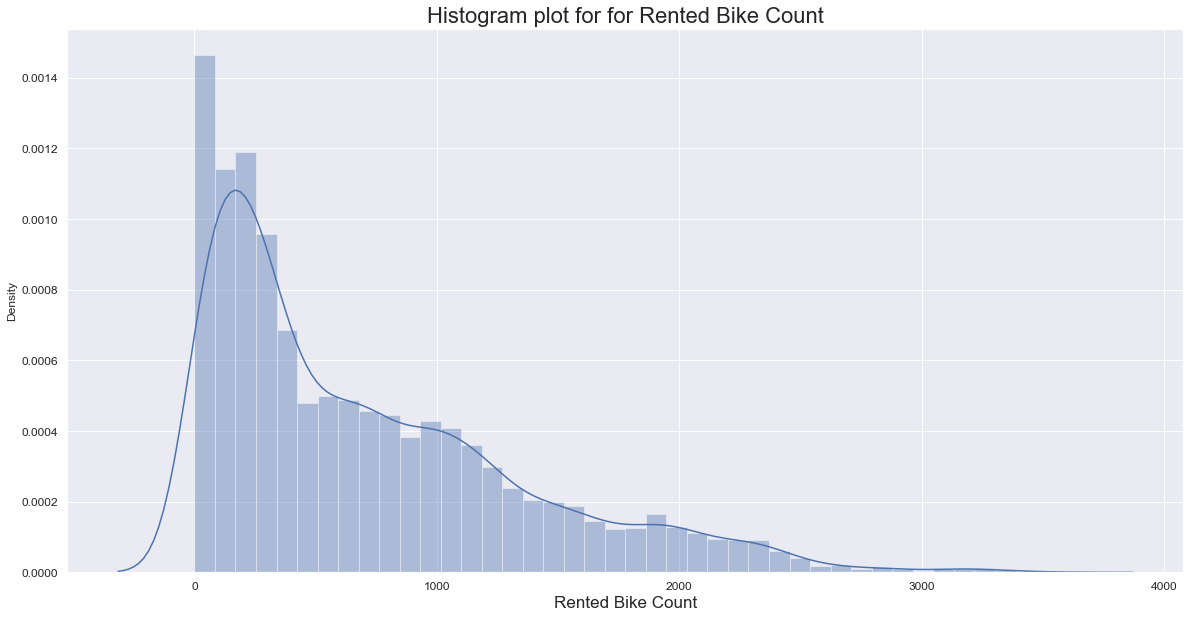

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Hour


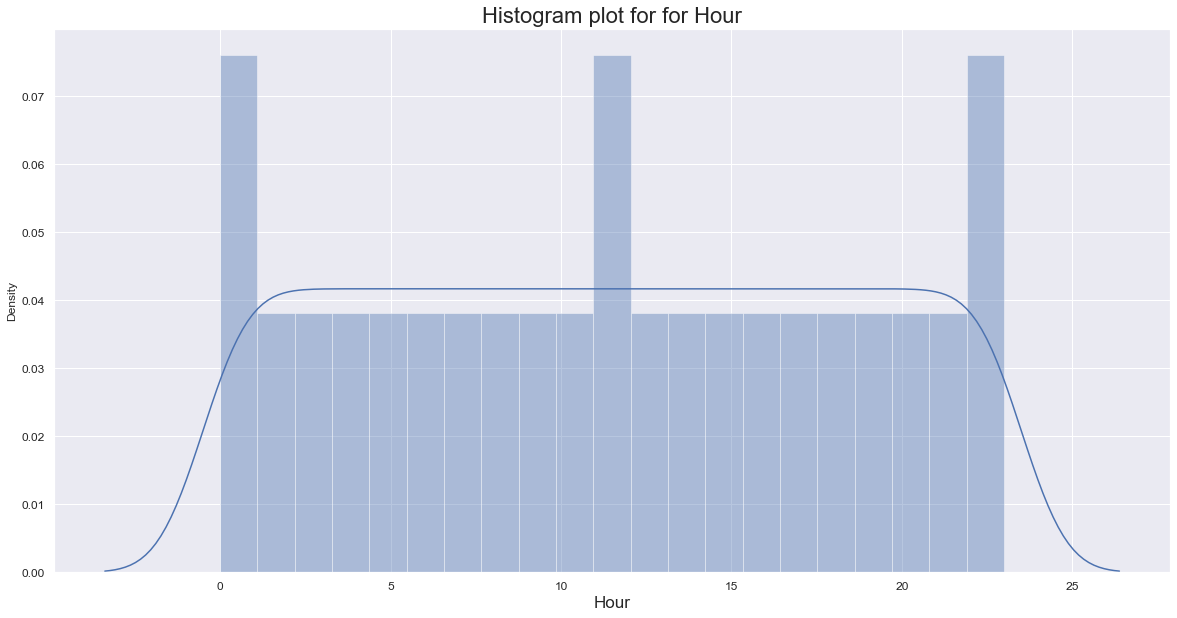

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Temperature(°C)


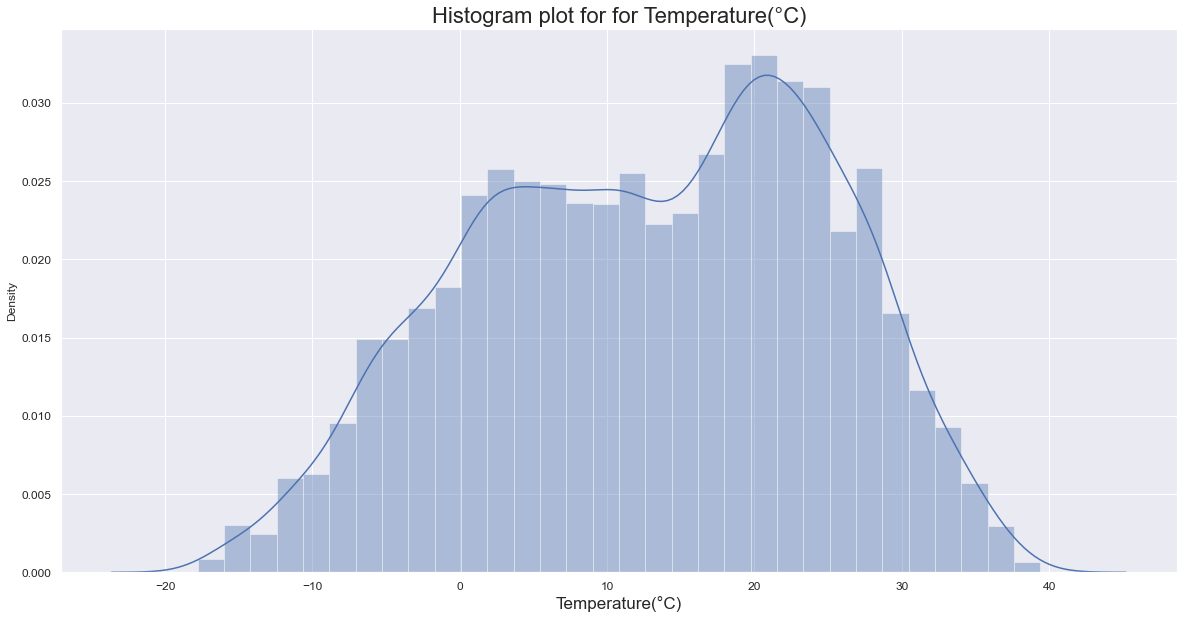

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Humidity(%)


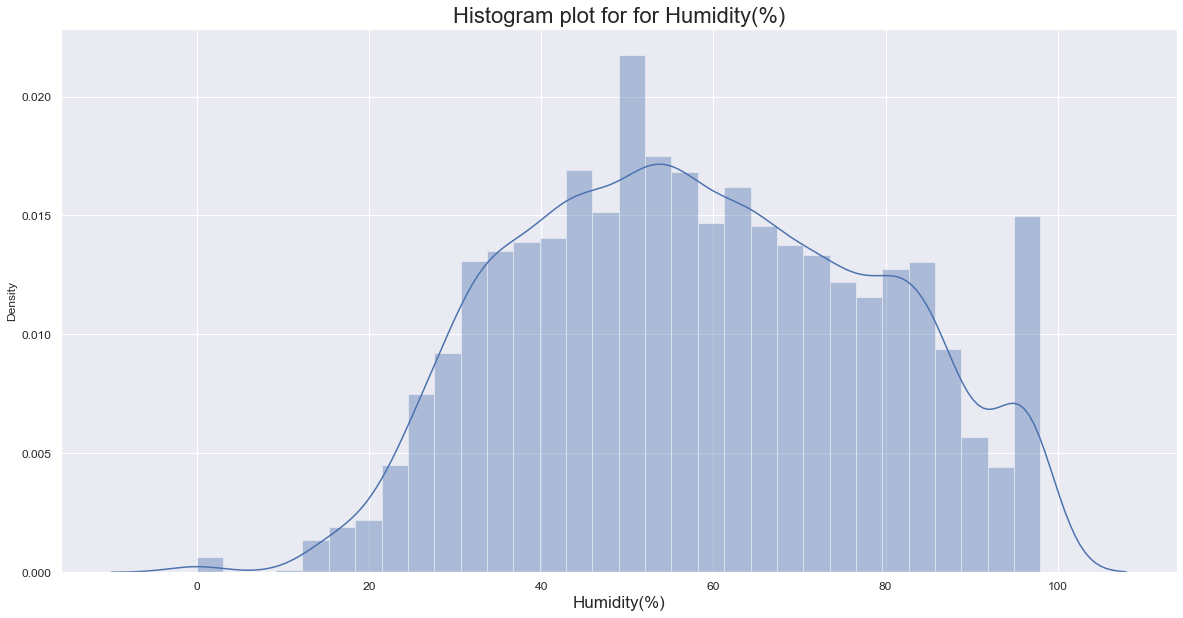

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Wind_speed_(m_s)


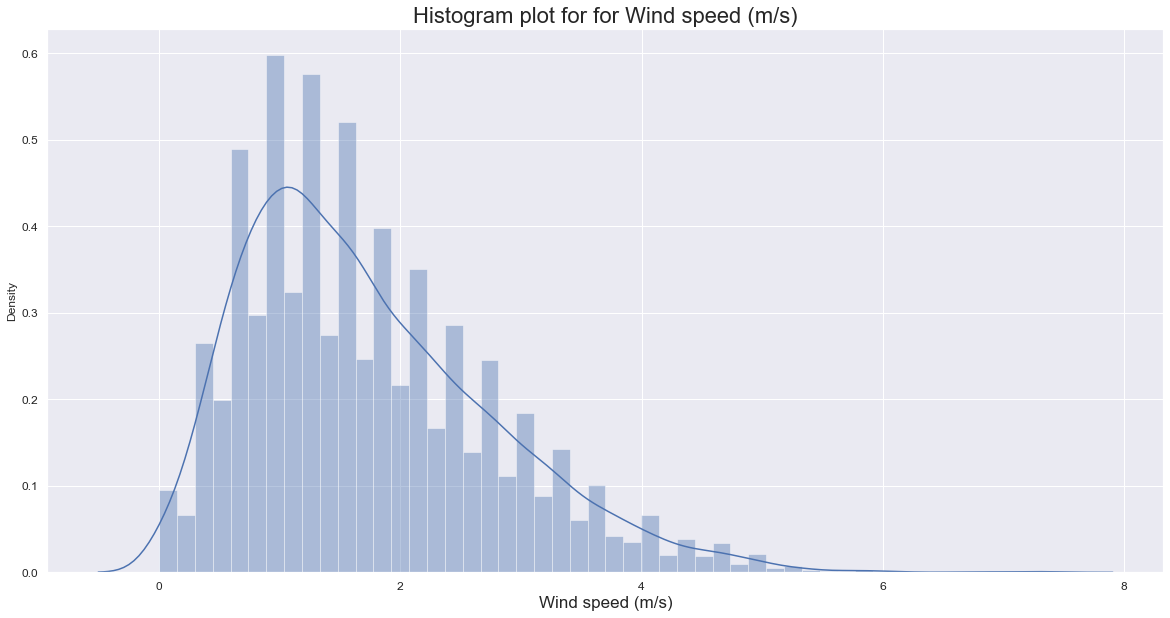

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Visibility_(10m)


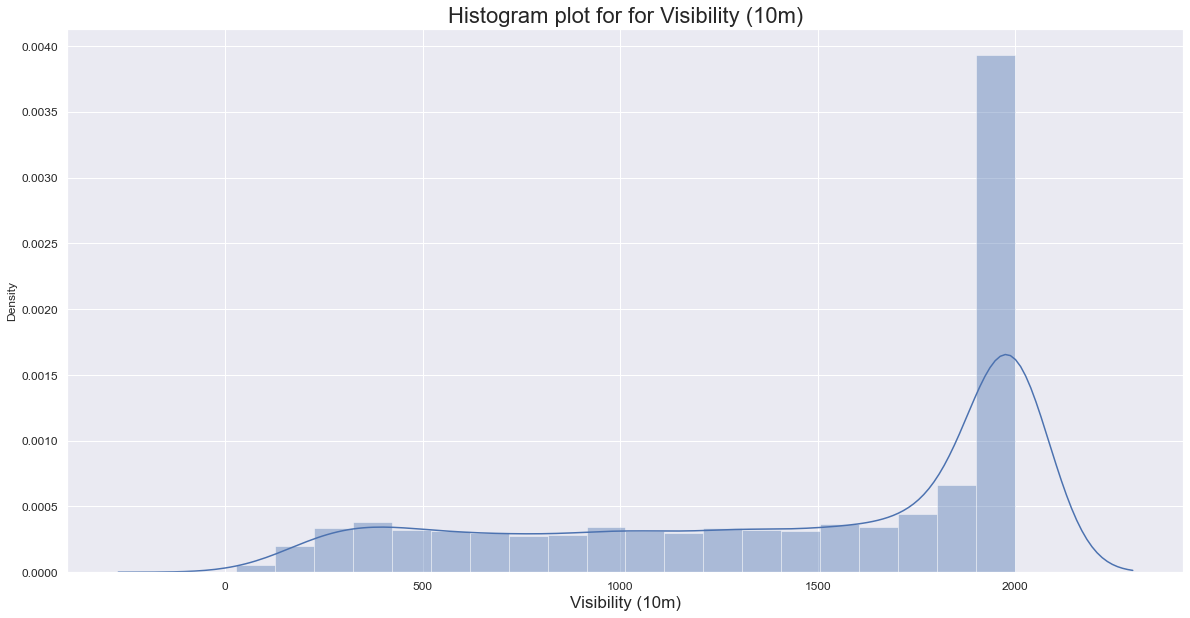

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Dew_point_temperature(°C)


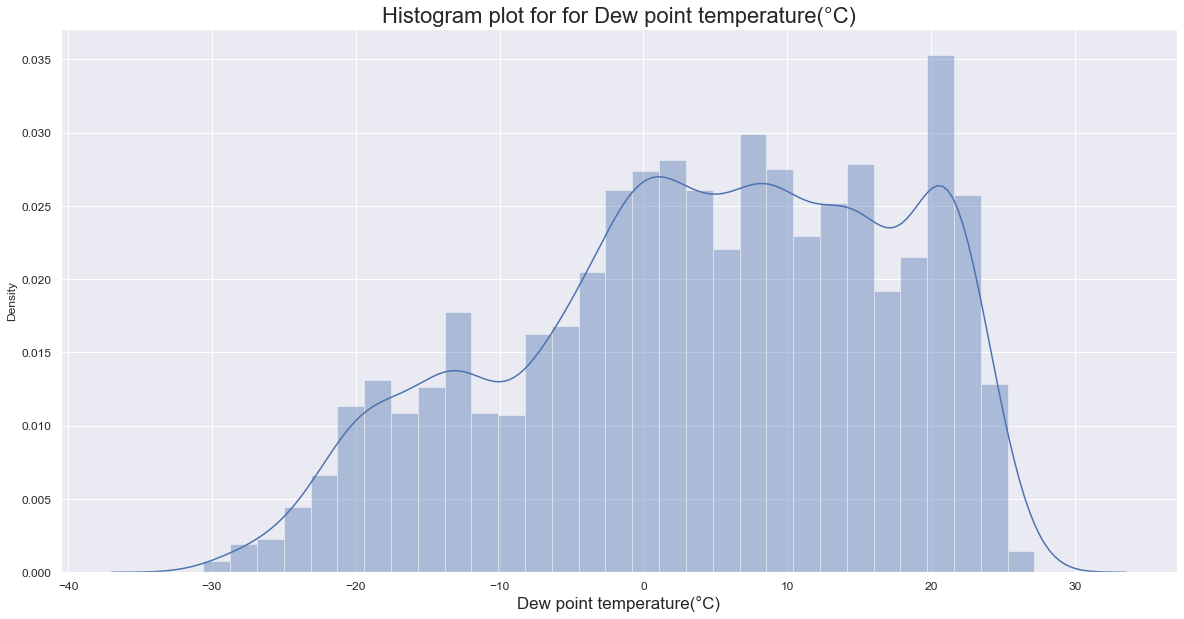

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Solar_Radiation_(MJ_m2)


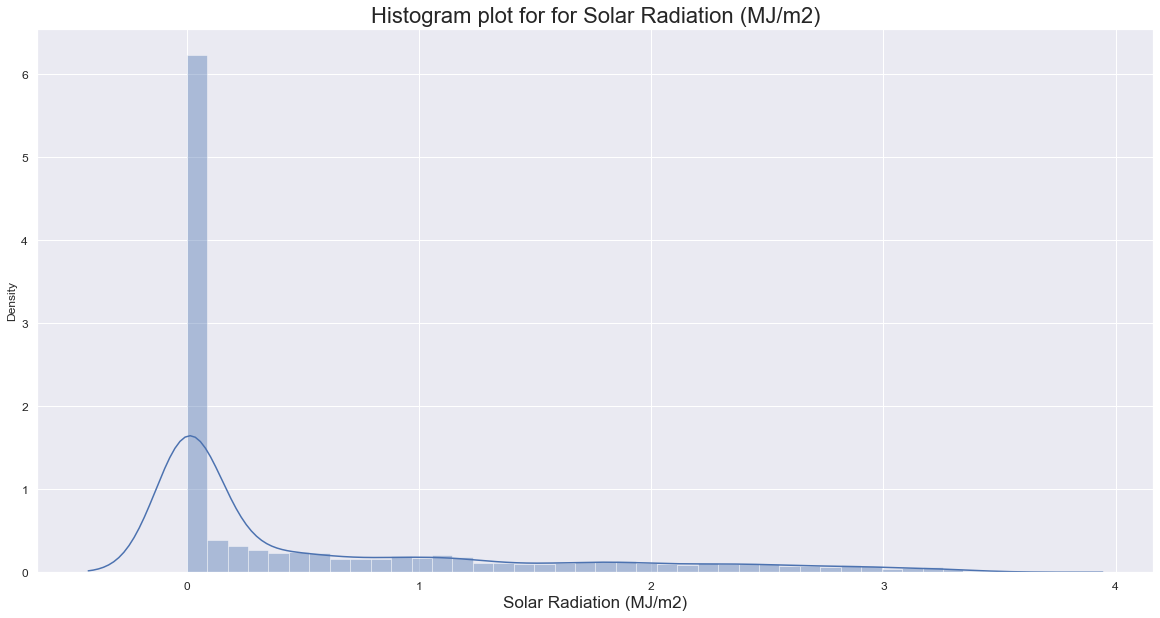

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Rainfall(mm)


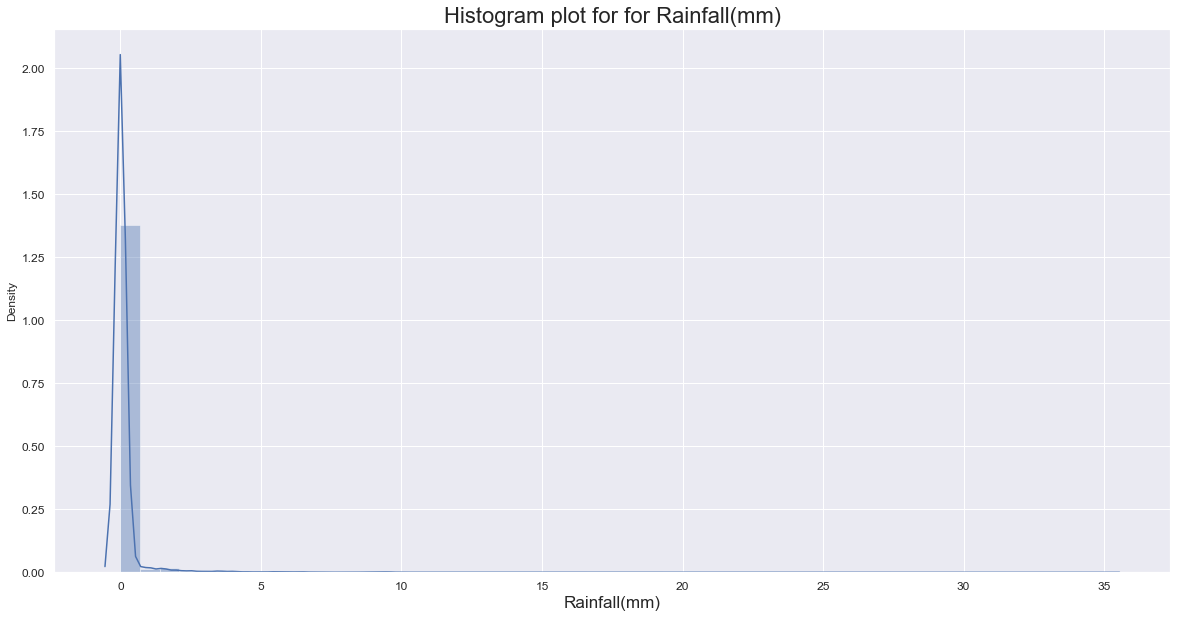

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Snowfall_(cm)


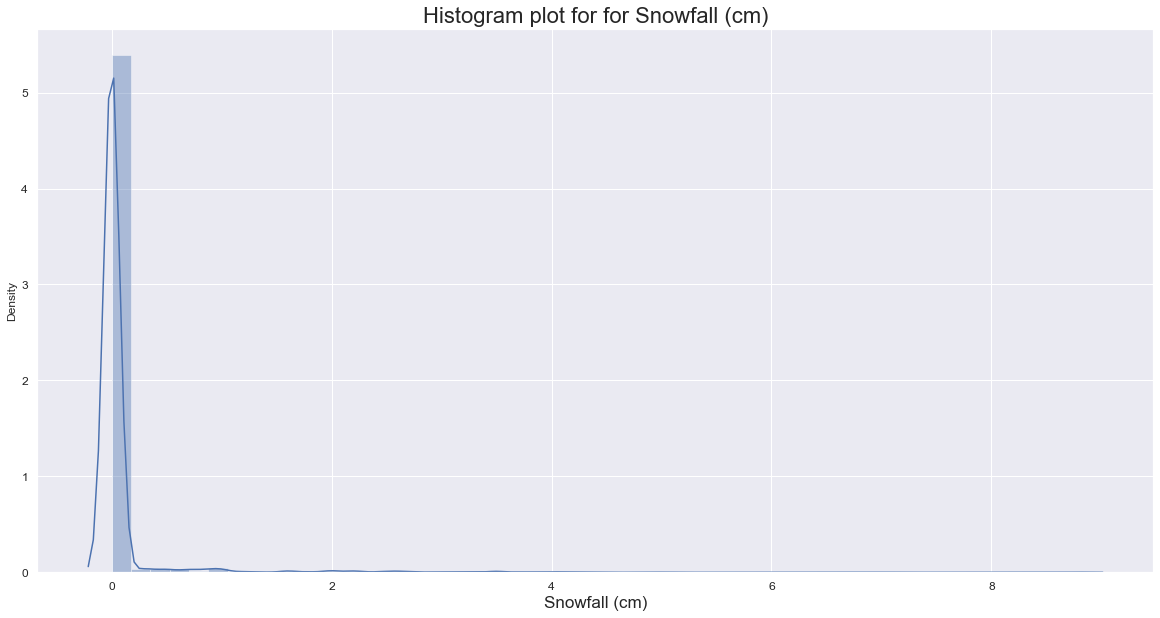

In [13]:
sns.set(rc={'figure.figsize':(20,10)})
width = 15
height = 8
feats = list(numeric_feats)
for feature in feats:
    fig=sns.distplot(
        bike_data[feature],
#         palette = 'mako',
#         split=True
    )
    plt.title(f'Histogram plot for for {feature}', fontsize=22)
    plt.xlabel(f'{feature}' , fontsize=17)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    feature_name = feature.replace(" ", "_").replace("/", "_")
    print(feature_name)
    plt.show()

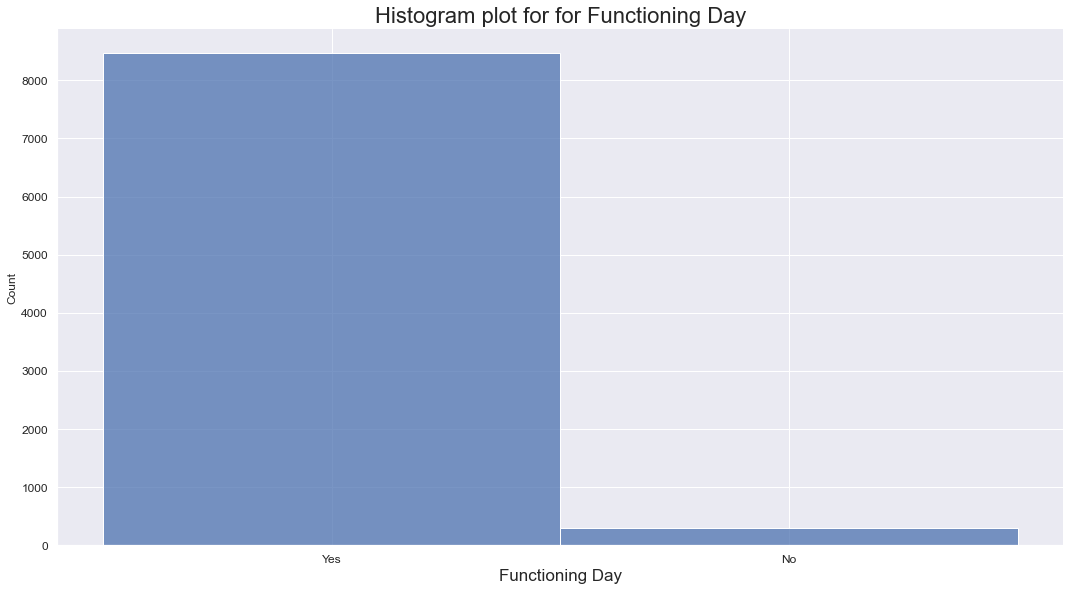

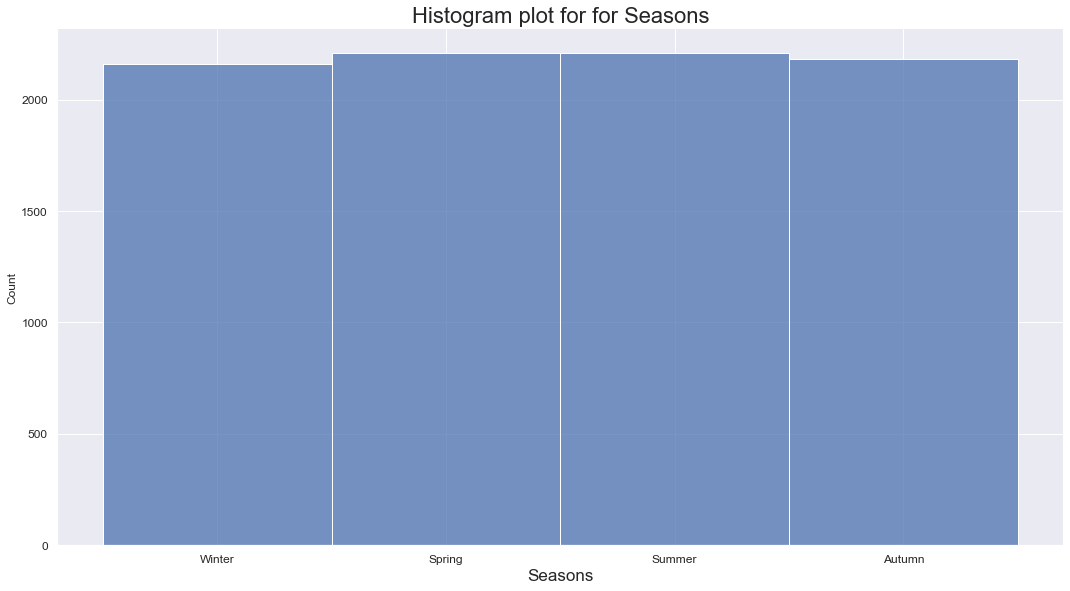

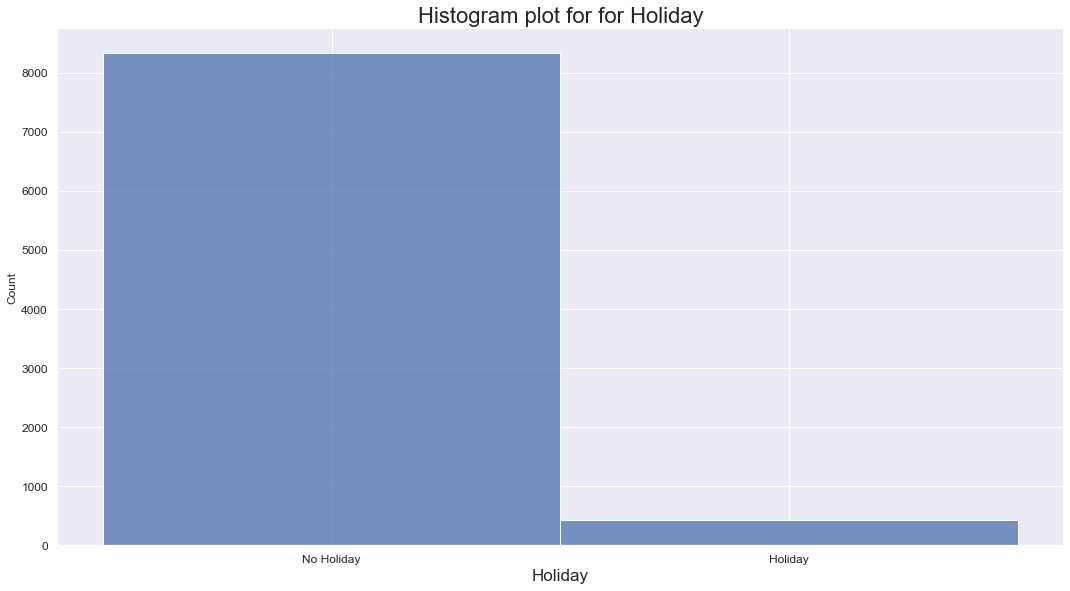

In [14]:
sns.set(rc={'figure.figsize':(20,10)})
width = 15
height = 8
feats = list(cat_feats)
for feature in feats:
    fig=sns.displot(
        bike_data[feature],
        height =8,
        aspect=15/8
#         palette = 'mako',
#         split=True
    )
    plt.title(f'Histogram plot for for {feature}', fontsize=22)
    plt.xlabel(f'{feature}' , fontsize=17)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

## Outliers

In [15]:
bike_data_index = pd.read_csv('Datasets/SeoulBikeData.csv', encoding= 'unicode_escape')

In [16]:
def detect_outliers(df,feature):
    outlier_indices = []
    c=feature
    Q1 = np.percentile(df[c],25)
    Q3 = np.percentile(df[c],75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    upper = outlier_step+Q3
    lower = Q1-outlier_step
    outlier_list_col = df[(df[c] < lower) | (df[c] > upper)].index

    return df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)] , upper , lower

for feat in numeric_feats:
    outliers , upper, lower = detect_outliers(bike_data_index,feat)
    print(f'Feature: {feat}, Upper: {round(upper,2)}, Lower: {round(lower,2)}, Count: {len(outliers)}')

Feature: Rented Bike Count, Upper: 2376.62, Lower: -1120.38, Count: 158
Feature: Hour, Upper: 34.5, Lower: -11.5, Count: 0
Feature: Temperature(°C), Upper: 51.0, Lower: -25.0, Count: 0
Feature: Humidity(%), Upper: 122.0, Lower: -6.0, Count: 0
Feature: Wind speed (m/s), Upper: 4.4, Lower: -1.2, Count: 161
Feature: Visibility (10m), Upper: 3590.0, Lower: -650.0, Count: 0
Feature: Dew point temperature(°C), Upper: 44.05, Lower: -33.95, Count: 0
Feature: Solar Radiation (MJ/m2), Upper: 2.33, Lower: -1.4, Count: 641
Feature: Rainfall(mm), Upper: 0.0, Lower: 0.0, Count: 528
Feature: Snowfall (cm), Upper: 0.0, Lower: 0.0, Count: 443


In [17]:
df_clamp = bike_data_index.copy()
def clamp_outliers(df,feature):
    df_rows , upper, lower  = detect_outliers(df,feature)
    df_new = df.copy()
    for row in df_rows.index:
        if df_rows.loc[row,feature] > upper:
            df_new.loc[row,feature] = upper
        elif df_rows.loc[row,feature] < lower:
            df_new.loc[row,feature] = lower            
    return df_new

for feat in numeric_feats:
    df_clamp[feat] = clamp_outliers(bike_data_index,feat)[feat]

for feat in numeric_feats:
    outliers , upper, lower = detect_outliers(df_clamp,feat)
    print(f'Feature: {feat}, Upper:{round(upper,2)}, Lower: {round(lower,2)}, Count: {len(outliers)}')

Feature: Rented Bike Count, Upper:2376.62, Lower: -1120.38, Count: 0
Feature: Hour, Upper:34.5, Lower: -11.5, Count: 0
Feature: Temperature(°C), Upper:51.0, Lower: -25.0, Count: 0
Feature: Humidity(%), Upper:122.0, Lower: -6.0, Count: 0
Feature: Wind speed (m/s), Upper:4.4, Lower: -1.2, Count: 0
Feature: Visibility (10m), Upper:3590.0, Lower: -650.0, Count: 0
Feature: Dew point temperature(°C), Upper:44.05, Lower: -33.95, Count: 0
Feature: Solar Radiation (MJ/m2), Upper:2.33, Lower: -1.4, Count: 0
Feature: Rainfall(mm), Upper:0.0, Lower: 0.0, Count: 0
Feature: Snowfall (cm), Upper:0.0, Lower: 0.0, Count: 0


In [18]:
df_clamp['Date'] = pd.to_datetime(df_clamp['Date'])
days = []
months = []
years = []
for date in df_clamp.Date:
    days.append(date.day)
    months.append(date.month)
    years.append(date.year)

df_clamp['Year'] = years
df_clamp['Month'] = months
df_clamp['Day'] = days
df_clamp
encoder = le()
for feat in cat_feats:
    df_clamp[feat] = encoder.fit_transform(df_clamp[feat].values)

X= df_clamp.drop(['Rented Bike Count','Date'],axis=1)
y=df_clamp['Rented Bike Count']


## Feature Selection

['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'Year', 'Month', 'Day']


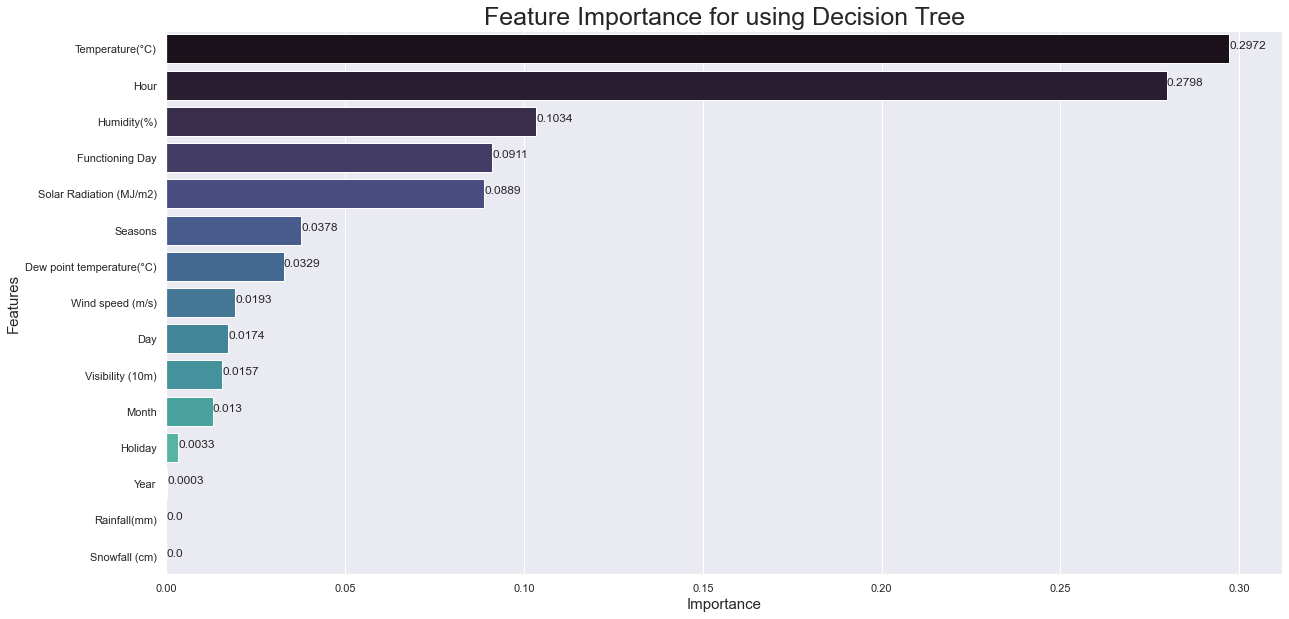

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

trans = RobustScaler()
X_train_scale = trans.fit_transform(X_train)
X_test_scale = trans.transform(X_test)

clf =  DecisionTreeRegressor(random_state=42)
clf.fit(X_train_scale , y_train)
importances = list(clf.feature_importances_)
columns = list(X_train.columns.values)
print(columns)
n = len(importances)
for i in range(len(importances)-1):
    for j in range(0,n-i-1):
        if importances[j]<importances[j+1]:
            importances[j], importances[j+1] = importances[j+1], importances[j]
            columns[j], columns[j+1] = columns[j+1], columns[j]
            
plt.figure(figsize = (20,10))
fig = sns.barplot(y=columns,
            x=importances,
            palette='mako'
)
dt_ranking = columns
for index, value in enumerate(np.round(np.array(importances),4)):
    plt.text(value, index, str(value), fontsize=12)
plt.title('Feature Importance for using Decision Tree', fontsize=25)
plt.xlabel('Importance' , fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()

In [21]:
X= df_clamp.drop(['Rented Bike Count','Date','Snowfall (cm)','Rainfall(mm)','Year'],axis=1)
y=df_clamp['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

## Regression Tree

MSE: 105776.53251640982
mean: 10.386843607305936
R2 Score: 0.7247016972260709


C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


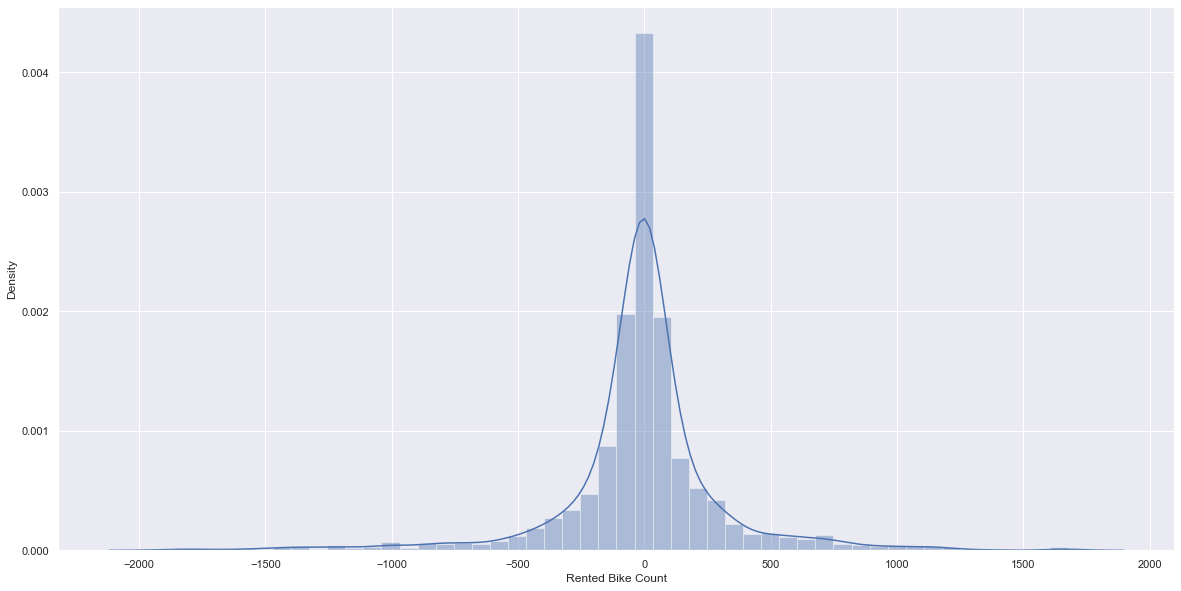

In [22]:
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train_scale,y_train)
y_pred = reg_tree.predict(X_test_scale)
print(f'MSE: {mse(y_pred,y_test)}')
print(f'mean: {np.mean(y_test-y_pred)}')
print(f'R2 Score: {r2_score(y_pred,y_test)}')
fig=sns.distplot(y_pred-y_test)

plt.show()

In [23]:
max_depth = np.arange(1,1+reg_tree.tree_.max_depth)
params = {'max_depth':max_depth}
grid = GridSearchCV(reg_tree,params)
grid.fit(X_train_scale, y_train) 
grid.best_params_

{'max_depth': 9}

In [24]:
reg_tree.tree_.max_depth

31

In [25]:
grid_predictions = grid.predict(X_test_scale)
print(f'MSE: {mse(grid_predictions,y_test)}')
print(f'mean: {np.mean(y_test-grid_predictions)}')
print(f'R2 Score: {r2_score(grid_predictions,y_test)}')
# print(f'Accuracy: {acc}')

MSE: 81368.52199277766
mean: 12.902252498862575
R2 Score: 0.7598272139606278


C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


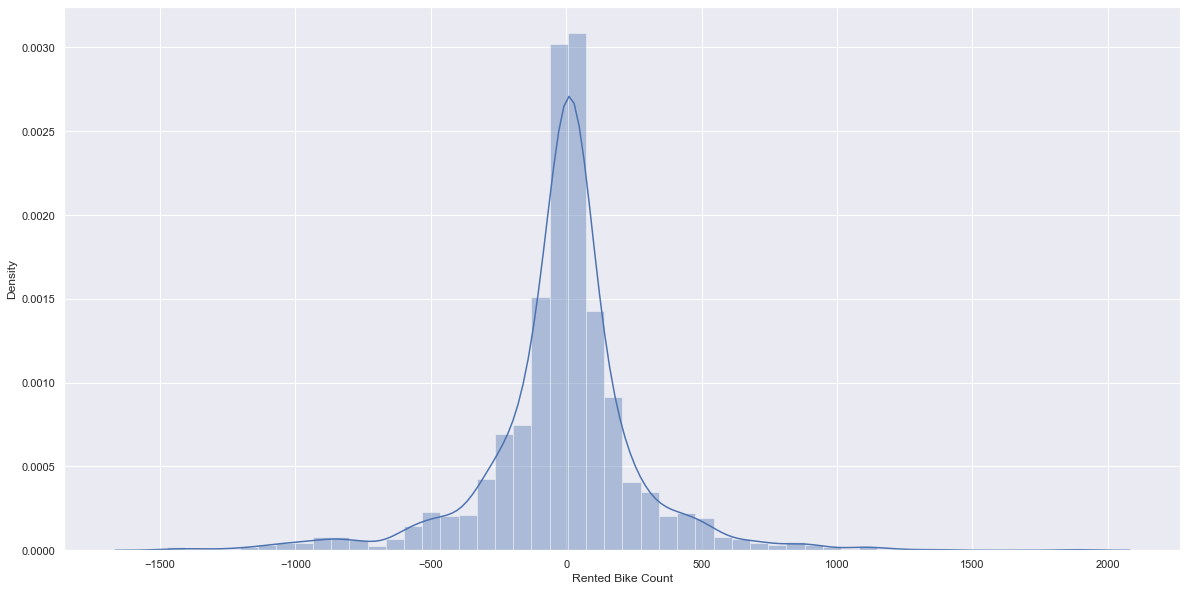

In [26]:
fig=sns.distplot(grid_predictions-y_test)
plt.show()

## KNN

In [27]:
n_neighbors = np.arange(1,50,2)
parameters = {
    'n_neighbors':n_neighbors,
    'weights':['uniform','distance'],
    'p':[1,2]
} 
knn = KNN_R(weights='uniform')
clf = GridSearchCV(knn, parameters)
clf.fit(X_train_scale,y_train)
clf.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

MSE: 81129.85553014069
mean: 24.59970484094744
R2 Score: 0.7362170687876144


C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


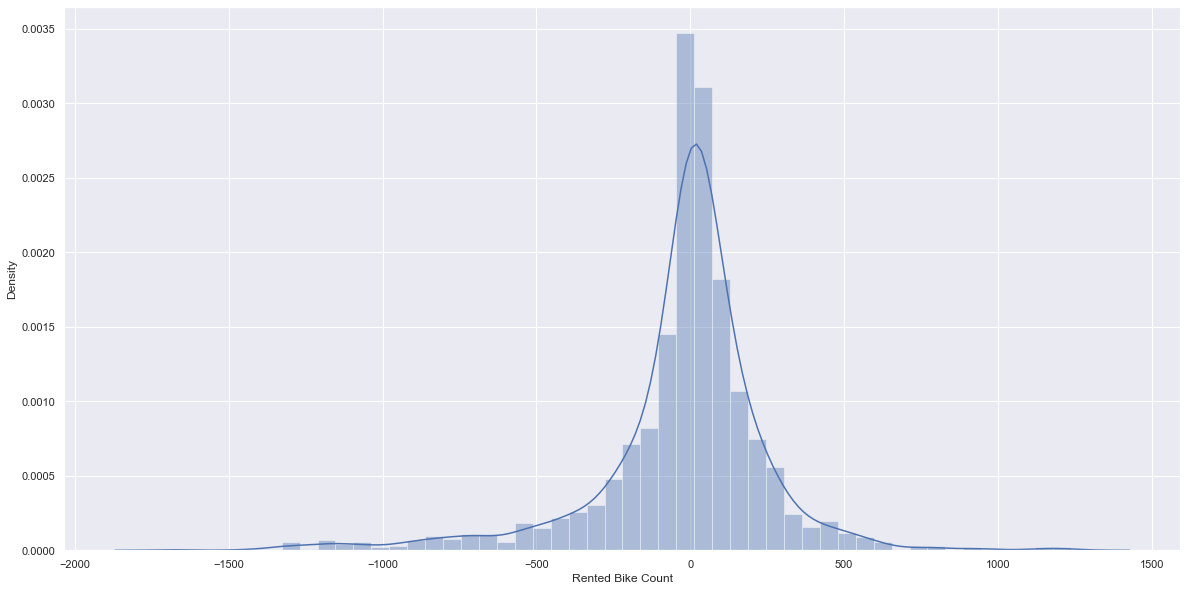

In [28]:
y_pred = clf.predict(X_test_scale)
print(f'MSE: {mse(y_pred,y_test)}')
print(f'mean: {np.mean(y_test-y_pred)}')
print(f'R2 Score: {r2_score(y_pred,y_test)}')
fig=sns.distplot(y_pred-y_test)
# plt.savefig(fig_dir+'knn_err.png')
plt.show()